In [152]:
# lista_05
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import scipy as scp
import scipy.integrate as integrate
from scipy.interpolate import interp1d

### Exercicio 01



 grau 𝑛 = 2, que passam por 𝑛+1 = 3 pontos {(𝑥0, 𝑦0), (𝑥1, 𝑦1), (𝑥2, 𝑦2)}, usando as funções 𝜙𝑖(𝑥), 𝑖 = 0, 1, 2: 

$$\begin{cases}\phi_0(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}\\
               \phi_1(x) = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}\\
               \phi_2(x) = \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{cases}$$

Encontrar os coeficientes do polinômio: 

$$p(x) = \sum²_{i=0}c_1 \phi_i (x)$$

 $x_i = [\phi_0(x[i]), \phi_1(x[i]), \phi_2(x[i])]$

De forma que a matriz $A$ será dada por:

$$A = \begin{pmatrix}\phi_0(x[0]) & \phi_1(x[0]) & \phi_2(x[0]) \\ \phi_0(x[1]) & \phi_1(x[1]) & \phi_2(x[1]) \\ \phi_0(x[2]) & \phi_1(x[2]) & \phi_2(x[2])\end{pmatrix}$$

Como $Ac = y$, ao receber a matriz $y$ utiliza-se np.linalg.solve para encontrar a matriz dos coeficientes.

In [153]:



def phi( x, lista_X): #coeficientes de Lagrange (os phi's)
 p_0 = ((x-lista_X[1])*(x-lista_X[2]))/((lista_X[0]-lista_X[1])*(lista_X[0]-lista_X[2]))
 p_1 = ((x-lista_X[0])*(x-lista_X[2]))/((lista_X[1]-lista_X[0])*(lista_X[1]-lista_X[2]))
 p_2 = ((x-lista_X[0])*(x-lista_X[1]))/((lista_X[2]-lista_X[0])*(lista_X[2]-lista_X[1]))
 return p_0, p_1, p_2

def interpolacao( x,y): #retorna os coeficientes do polinomio interpolador
    x0 = phi(x[0], x)
    x1 = phi(x[1], x)
    x2 = phi(x[2], x)

    A = np.matrix([[x0[0], x0[1], x0[2]], [x1[0], x1[1], x1[2]], [x2[0], x2[1], x2[2]]])
    C = np.linalg.solve(A, y)
    print("Matriz A:\n", A, "\n") #a matriz a deve ser a matriz identidade pois os coeficientes de lagrange sao 1
    print("Vetor C:\n", C, "\n") #os coeficientes do polinomio interpolador
    return C
def solucao( x, list_p, linearizada, tamanho): #retorna a solucao do sistema
    soma=0
    for i in range(tamanho):
        soma+= list_p[i]*linearizada[i] #multiplica os coeficientes do polinomio interpolador com a linearizada
    return soma

In [154]:


pontosX = [2, 6, 4]         # x0, x1, x2
pontosY = [14, 24, 25]      # y0, y1, y2

C = interpolacao(pontosX, pontosY)
print(C)



print(soma) #resultado da interpolação

print("provando a teoria da matriz de vandermonde ")

print("a matriz de vandermonde é a matriz identidade, pois os coeficientes de lagrange sao 1 logo os valores que entrares serao os que vao sair")
#matriz de vandermonde

Matriz A:
 [[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]] 

Vetor C:
 [14. 24. 25.] 

[14. 24. 25.]
14.0
provando a teoria da matriz de vandermonde 
a matriz de vandermonde é a matriz identidade, pois os coeficientes de lagrange sao 1 logo os valores que entrares serao os que vao sair


### Exercicio 2


In [155]:
def R(x): #funçao q sera trabalhada
    return 1.0 / (1.0 + 25.0 * x**2)

# Calculate points and interpolate
def calculate_points(info, P_x, P_y, tipo):
    xeval = np.linspace(-info, info, 40000) # cria o espaço de x
    yeval = R(xeval) # calcula o valor de y para cada x
    y_resp = interp1d(P_x, P_y, kind=tipo) # interpola os pontos
    return xeval, yeval, y_resp

# Plot the graph
def grafico(pointsX, pointsY, xeval, yeval, y_resp):
    plt.plot(pointsX, pointsY, 'ob', label='Data Points')
    plt.plot(xeval, yeval, '-r', label='R(x)')
    plt.plot(xeval, y_resp(xeval), '-g', label='interpolado')
    plt.legend()
    plt.show()

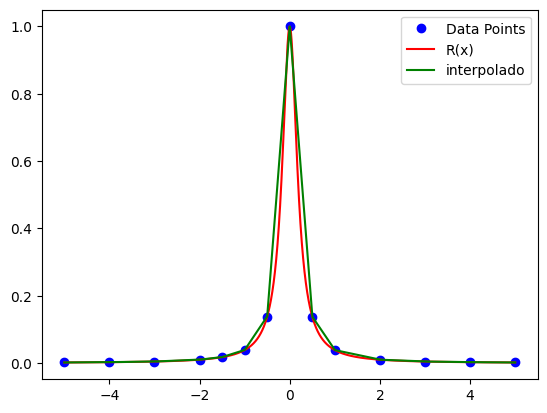

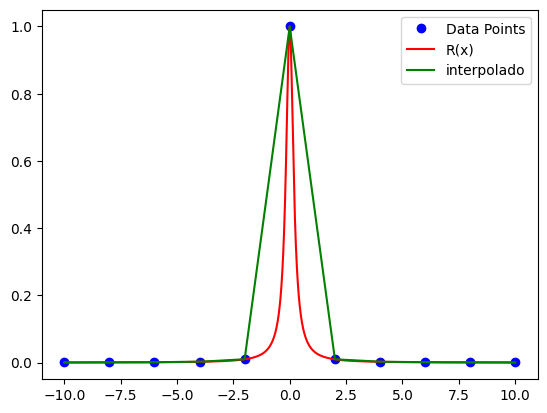

In [156]:
x1 = np.array([-5, -4, -3, -2, -1.5, -1, -0.5, 0, 0.5, 1, 2, 3, 4, 5])
y1 = R(x1)
x2 = np.array([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])
y2 = R(x2)

# Plotting
xeval, yeval, y_resp = calculate_points(5, x1, y1, 'linear')
grafico(x1, y1, xeval, yeval, y_resp)

xeval, yeval, y_resp = calculate_points(10, x2, y2, 'linear')
grafico(x2, y2, xeval, yeval, y_resp)

#da pra ver que a interpolação linear não é a melhor escolha para a função R(x)

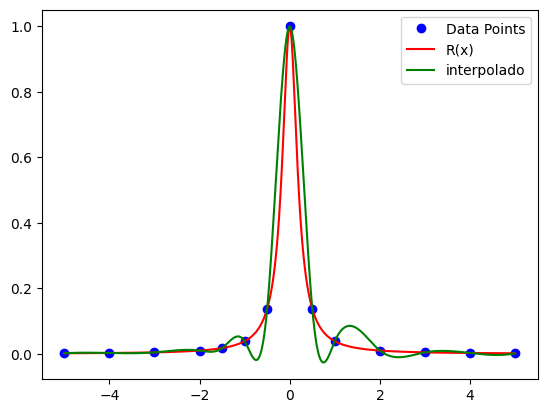

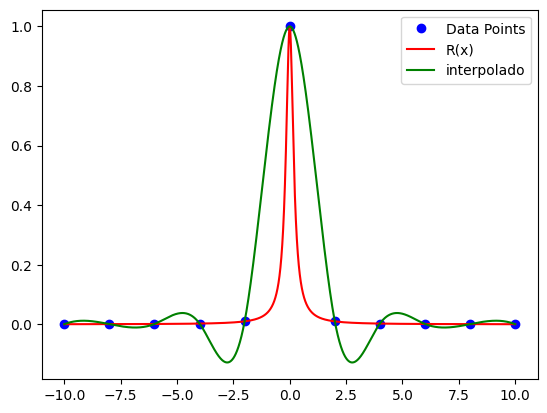

In [157]:
xeval, yeval, y_resp = calculate_points(5, x1, y1, 'cubic')
grafico(x1, y1, xeval, yeval, y_resp)

xeval, yeval, y_resp = calculate_points(10, x2, y2, 'cubic')
grafico(x2, y2, xeval, yeval, y_resp)

#### da pra ver que a interpolação linear não é a melhor escolha para a função R(x)

### Exercicio 3


### PDF

### Exercicio 04


In [158]:
data = np.loadtxt('data.txt', dtype = 'f', delimiter = ' ')

c1 = data[:,0]
c2 = data[:,1]
c3 = data[:,2]
c4 = data[:,3]

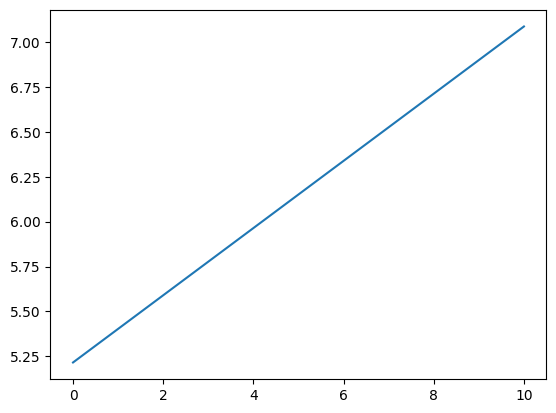

In [159]:
A = np.zeros(shape=(100,2)) #matriz de coeficientes tendo 2 colunas
At = np.zeros(shape=(100,2))
A[:, 0] = 1 # vetor de 1
A[:, 1] = c1 # vetorcom c1


# B = A^t @ A => matriz quadrada 
A_t=np.transpose(A) #transposta de A
B=A_t@A # produto matricial


y = np.zeros(shape=(100,1)) #cria espaço
y[:,0] = c3

# Descobrindo a 'matriz' de coeficientes da equação polinomial de grau 1
c = np.linalg.solve(B,(A_t@y))

# avaliação da função polinomial
x_graph = np.linspace(0, 10, 1000)
y_graph = np.polyval(c, x_graph)

plt.plot(x_graph, y_graph)
y = np.zeros(shape=(100,1))
y[:,0] = c3


# Descobrindo a 'matriz' de coeficientes da equação polinomial de grau 1



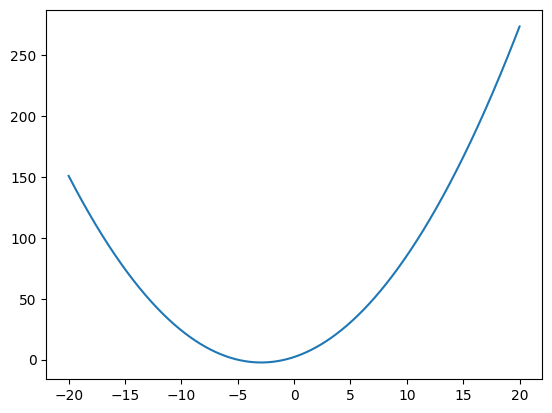

In [160]:
A = np.zeros(shape=(100,3)) #matriz de coeficientes tendo 3 colunas
At = np.zeros(shape=(100,3))
A[:, 0] = 1 # constantes
A[:, 1] = c1 # termo linear

for i in range(len(data)-1):
    A[i][2] = (float(c1[i]))**2  # termos quadraticos

A_t=np.transpose(A) #transposta de A
B=A_t@A # produto matricial

y = np.zeros(shape=(100,1)) # vetor de resultados
y[:,0] = c3


c = np.linalg.solve(B,(A_t@y))#coeficientes EQ polinom 2 grau

# Avaliando em diversos pontos
x_graph = np.linspace(-20, 20, 1000) #pontos de -20 a 20
y_graph = np.polyval(c, x_graph) #avaliando a função polinomial

plt.plot(x_graph, y_graph)



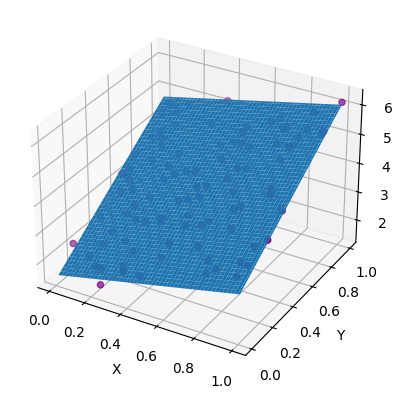

In [161]:
A = np.zeros(shape=(100,3))
At = np.zeros(shape=(100,3))
A[:, 0] = 1 #constante
A[:, 1] = c1 # termo linear var 1 x
A[:, 2] = c2 # termo linear var 2 y

# B = A^t @ A => matriz quadrada 
A_t=np.transpose(A) #transposta de A
B=A_t@A # produto matricial

# A^t Ac = A^t y -> Bc = A^t @ y
#vetor resposta
y = np.zeros(shape=(100,1)) 
y[:,0] = c4
 

c = np.linalg.solve(B,(A_t@y))  #coeficientes 

x = np.linspace(min(data[:,0]), max(data[:,0]), 100) #cria 100 pontos entre os valores mínimos e máximos de x e y
y = np.linspace(min(data[:,1]), max(data[:,1]), 100) 
# cria 100 pontos entre os valores mínimos e máximos de x e y

x = np.tile(x, (100, 1))
y = np.tile(y, (100, 1)).T
#cria grades 2d pelo tile 

#regressão linear nos pontos da grade
z = c[0] + x * c[1] + y * c[2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data[:,0], data[:,1], data[:,3], color = 'purple')
ax.plot_surface(x,y,z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F(x,y)')

plt.show()


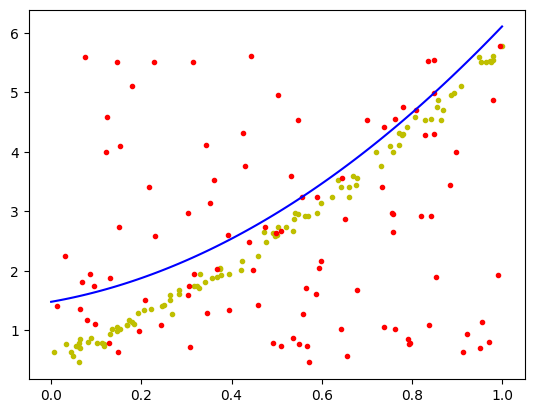

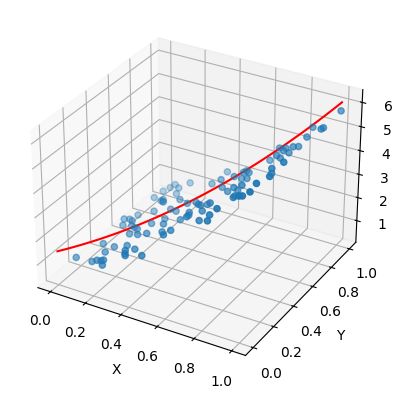

In [162]:
x = y = np.linspace(0, 1, 100)

coef = [c[2], c[1],c[0]]
z = np.polyval(coef, x)

plt.plot(c1, c3, '.y')
plt.plot(c2, c3, '.r') 
plt.plot(x, z, '-b')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(c1, c2, c3)
ax.plot(x,y,z,'-r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

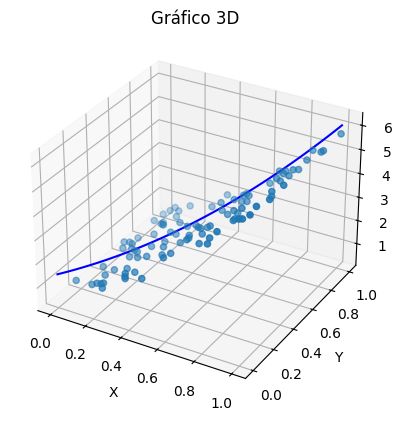

In [163]:

# Gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(c1, c2, c3)
ax.plot(x, y, z, '-b')

ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
plt.title('Gráfico 3D')
plt.show()
#FUNCIONAAAAA


### exericio 05

In [164]:
def media(v1, v2):
    return (v1 + v2) / 2

def func(x):
    return 4 / (1 + x**2)

def integral(a, b, lista, func):
    medio = []
    trapezio = []
    simpson = []

    for i in lista:
        h = (b - a) / i # calcula a largura do intervalo
        x = a + np.arange(1, i + 1) * h # cria o intervalo
        x_prev = x - h
        y = media(x_prev, x)

        medio_ = h * np.sum(func(y)) #integral de Riemann
        trapezio_ = h * (np.sum(func(x_prev) + func(x)) / 2) #integral do trapezio
        simpson_ = h * (np.sum(func(x_prev) + 4 * func(y) + func(x)) / 6) #integral de Simpson

        medio.append(medio_)
        trapezio.append(trapezio_)
        simpson.append(simpson_)

    return medio, trapezio, simpson

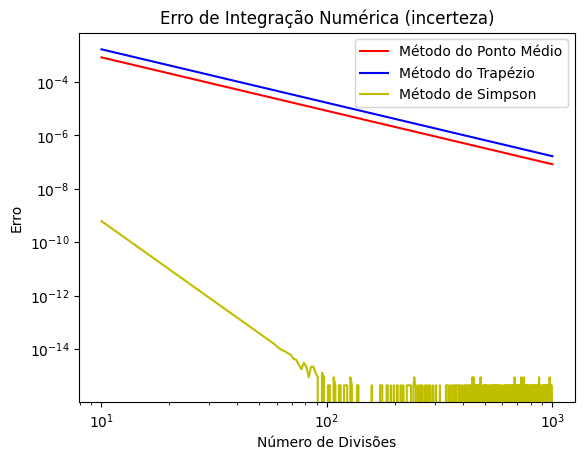

In [165]:
i = np.linspace(10, 10**3, 500, dtype=int)
a = 0
b = 1

difmedio, diftrapezio, difsimpson = integral(a, b, i, func)

for j in range(len(i)): # pega a diferença dos metodos
    difmedio[j] = abs(np.pi - difmedio[j])
    diftrapezio[j] = abs(np.pi - diftrapezio[j])
    difsimpson[j] = abs(np.pi - difsimpson[j])

plt.loglog(i, difmedio, 'r', label='Método do Ponto Médio')
plt.loglog(i, diftrapezio, 'b', label='Método do Trapézio')
plt.loglog(i, difsimpson, 'y', label='Método de Simpson')

plt.title('Erro de Integração Numérica (incerteza)')
plt.xlabel('Número de Divisões')
plt.ylabel('Erro')
plt.legend()
plt.show()

### Exercicio 06

In [166]:
import numpy as np
import math
#estas funçoes irao ser usadas para calcular a potencia
def GeraRede(nx, ny, X):
    nv = nx * ny # Número de nós
    nc = (nx - 1) * ny + (ny - 1) * nx # Número de canos
    
    coord = np.zeros(shape=(nv, 2))

    for i in range(nx): # Loop sobre os nós
        for j in range(ny): # Loop sobre os nós
            ig = i + j * nx
            coord[ig, 0] = i
            coord[ig, 1] = j

    conec = np.zeros(shape=(nc, 2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(ny): # Loop sobre canos horizontais
        for i in range(nx - 1): # Loop sobre canos horizontais
            k = j * (nx - 1) + i
            conec[k, 0] = j * nx + i
            conec[k, 1] = j * nx + i + 1
            C[k] = 2.3 + 10 * pow(math.e, -pow(X - 5, 2))
            

    # Loop sobre canos verticais
    for i in range(nx): # Loop sobre canos verticais
        for j in range(ny - 1): # Loop sobre canos verticais
            k = (nx - 1) * ny + j * nx + i
            conec[k, 0] = i + j * nx
            conec[k, 1] = i + (j + 1) * nx
            C[k] = 1.8 + 10 * pow(math.e, -pow(X - 5, 2))

    return nv, nc, conec, C, coord

def MontaMatriz(conec, C, nv, nc): # Monta a matriz de condutâncias
    A = np.zeros(shape=(nv, nv))
    for k in range(nc):
        n1 = conec[k, 0]
        n2 = conec[k, 1]

        A[n1, n2] += -C[k]
        A[n2, n1] += -C[k]
        A[n1, n1] += C[k]
        A[n2, n2] += C[k]
    
    return A

def ResolveRede(conec, C, natm, nB, QB, nv, nc): # Resolve o sistema de pressões
    Atilde = MontaMatriz(conec, C, nv, nc)
    Atilde[natm, :] = 0
    Atilde[natm, natm] = 1
    
    b = np.zeros(shape=nv) # Vetor de pressões
    b[nB] = QB # Condição de contorno
    pressao = np.linalg.solve(Atilde, b) # Resolve o sistema de pressões
    return pressao

def ObtemDK(conec, C, nv, nc): # Obtem a matriz de condutâncias e a matriz de incidência
    K = np.zeros(shape=(nc, nc))
    InciD = np.zeros(shape=(nc, nv))
    
    for i in range(nc): # Loop sobre os canos
        K[i, i] = C[i]

    for k in range(nc): # Loop sobre os canos
        n1 = conec[k, 0] # Nó 1
        n2 = conec[k, 1] # Nó 2
        InciD[k, n1] = 1 # Matriz de incidência
        InciD[k, n2] = -1 # Matriz de incidência

    return K, InciD

def CalculaPotencia(conec, P, C, nv, nc): 
    Kondutancia, D = ObtemDK(conec, C, nv, nc)
    return (np.transpose(P) @ (np.transpose(D) @ Kondutancia @ D) @ P)


def CalculaPot(X): 
    n, m = 8, 9
    QB = 3
    nAtm = n * m - 1
    nB = 0
    
    W = []

    for x in X:  #por cada x calcula a potência
        nv, nc, conec, C, coord = GeraRede(n, m, x)
        P = ResolveRede(conec, C, nAtm, nB, QB, nv, nc)
        W.append(CalculaPotencia(conec, P, C, nv, nc)) 
        
    return np.array(W)





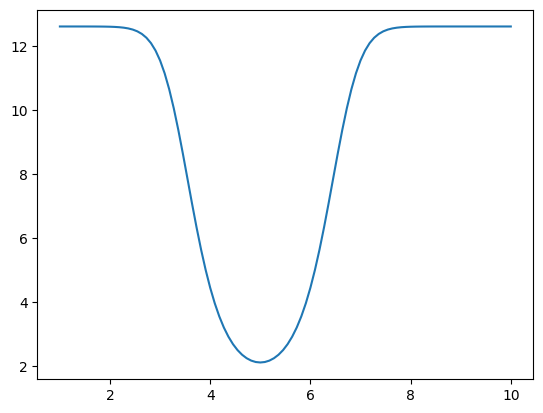

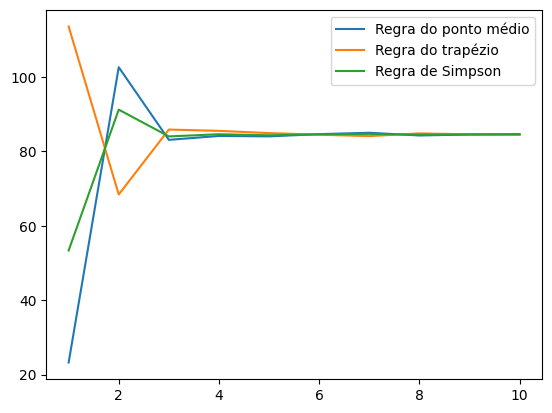

In [167]:
div = np.linspace(1, 10, 100) #cria 100 pontos entre 1 e 10
P = CalculaPot(div)
plt.plot(div, P)
plt.show()

a = 1
b = 10

n = np.linspace(1, 10, 10)


_pMedio, _pTrapezio, _pSimpson = integral(a, b, n, CalculaPot) #calcula a integral

plt.plot(n, _pMedio)
plt.plot(n, _pTrapezio)
plt.plot(n, _pSimpson)

plt.legend(["Regra do ponto médio", "Regra do trapézio", "Regra de Simpson"], loc="upper right")
plt.show()


### Exercicio 07

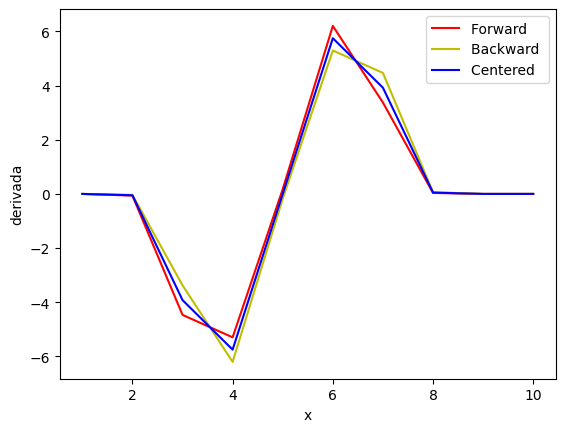

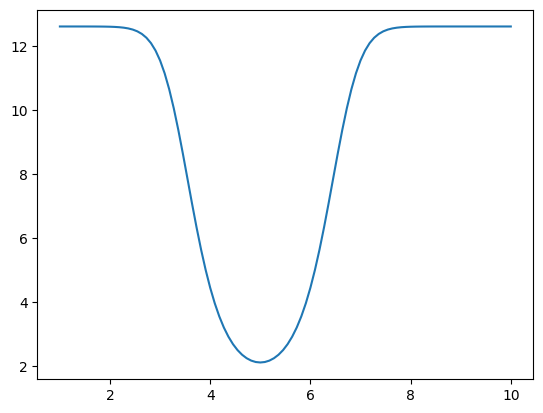

In [168]:
import numpy as np
import matplotlib.pyplot as plt

def C_pot(X):
    n = 8
    m = 9
    QB = 3
    nAtm = n * m - 1
    nB = 0
    
    W = []

    for x in X:
        nv, nc, conec, C, coord = GeraRede(n, m, x)
        P = ResolveRede(conec, C, nAtm, nB, QB, nv, nc)
        W.append(CalculaPotencia(conec, P, C, nv, nc)) 
        
    return np.array(W)

def drvd(x, fun, h):
    resF = (fun(x + h) - fun(x)) / h
    resB = (fun(x) - fun(x - h)) / h
    resC = (fun(x + h) - fun(x - h)) / (2 * h)
    return resF, resB, resC

# gera x
x = np.linspace(1, 10, 10)
dist = 1e-1

# a derivada de cada tipo
resF = []
resB = []
resC = []

for xi in x:
    f, b, c = drvd(np.array([xi]), C_pot, dist)
    resF.append(f[0])
    resB.append(b[0])
    resC.append(c[0])

resF = np.array(resF)
resB = np.array(resB)
resC = np.array(resC)

# Plot the results
plt.plot(x, resF, "-r", label="Forward ")
plt.plot(x, resB, "-y", label="Backward ")
plt.plot(x, resC, "-b", label="Centered ")
plt.legend()
plt.xlabel("x")
plt.ylabel("derivada")

plt.show()


h = np.linspace(1, 10, 100)
plt.plot(div, C_pot(h))

plt.show()


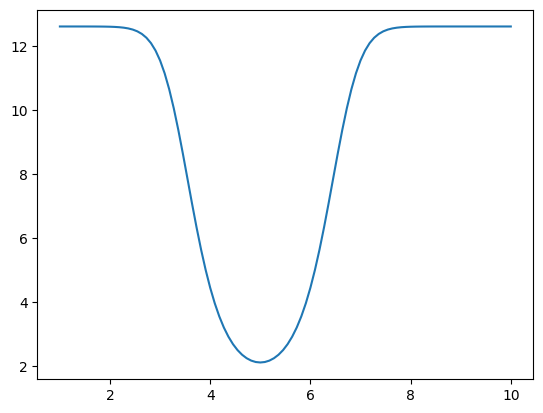

TypeError: 'numpy.float64' object is not iterable

In [169]:
p=np.linspace( 1, 10 ,100)

plt.plot(div, C_pot(p))
plt.show()

def drvd(x, fun, dist):
    resF = (fun(x + dist) - fun(x)) / dist
    resB = (fun(x) - fun(x - dist)) / dist
    resC = (fun(x + dist) - fun(x - dist)) / (2 * dist)
    return resF, resB, resC

# Generate the x values
x = np.linspace(1, 10, 10)
h = 1e-1

# Compute the derivatives for each x value
resF = []
resB = []
resC = []

for xi in x:
    f, b, c = drvd(xi, C_pot, h)
    resF.append(f)
    resB.append(b)
    resC.append(c)

resF = np.array(resF)
resB = np.array(resB)
resC = np.array(resC)

# Plot the results
plt.plot(x, resF, "-r", label="Forward finite difference")
plt.plot(x, resB, "-g", label="Backward finite difference")
plt.plot(x, resC, "-b", label="Centered finite difference")
plt.legend()
plt.xlabel("x")
plt.ylabel("Derivative")
plt.title("Finite Difference Derivatives")
plt.show()

### Exercicio 08


In [ ]:
def Cal_Der(x, funcao, dist):
    resF = (funcao(x + dist) - funcao(x))/dist
    resB = (funcao(x) - funcao(x - dist))/dist
    resC = (funcao(x + dist) - funcao(x - dist))/(2*dist)

    return resF, resB, resC


def Func(x):
    return (x * pow(math.e, -x) * math.cos(2*x)) # x * e^(-x) * cos(2x)
def Der(x):
    return ((1-x) * math.cos(2*x) - 2*x*math.sin(2*x)) / (math.e**x) #derivada da função

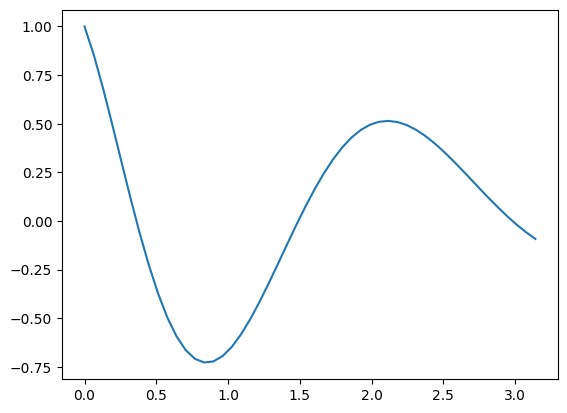

In [ ]:

X = np.linspace(0, np.pi) #cria 100 pontos entre 0 e pi
der = []

for x in X:
    der.append(Der(x)) #calcula a derivada da função

plt.plot(X, der)
plt.show()

Usando as fórmulas de diferenciação numérica, calcular a derivada $f'_a$ (aproximada) e plotar como função de $x$ no intervalo $[0, \pi]$. Usar valores de $\delta$ = 0.2, 0.1, 0.05 e 0.025.

In [ ]:
def Cal_Der(x, funcao, dist):
    resF = (funcao(x + dist) - funcao(x))/dist #diferença finita para frente
    resB = (funcao(x) - funcao(x - dist))/dist #diferença finita para trás
    resC = (funcao(x + dist) - funcao(x - dist))/(2*dist) #diferença finita central(pela média)

    return resF, resB, resC

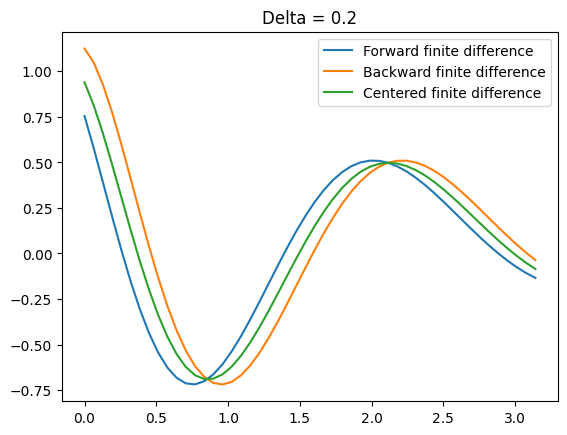

In [ ]:
X = np.linspace(0, np.pi)
delta = 0.2
derF = []
derB = []
derC = []

for x in X:

    f, b, c = Cal_Der(x, Func, delta) #calcula a derivada da função
    derF.append(f) #adiciona a derivada calculada na lista
    derB.append(b) #adiciona a derivada calculada na lista
    derC.append(c)  #adiciona a derivada calculada na lista

plt.plot(X, derF, label="Forward finite difference")
plt.plot(X, derB, label="Backward finite difference")
plt.plot(X, derC, label="Centered finite difference")
plt.legend()
plt.title("Delta = 0.2")
plt.show()

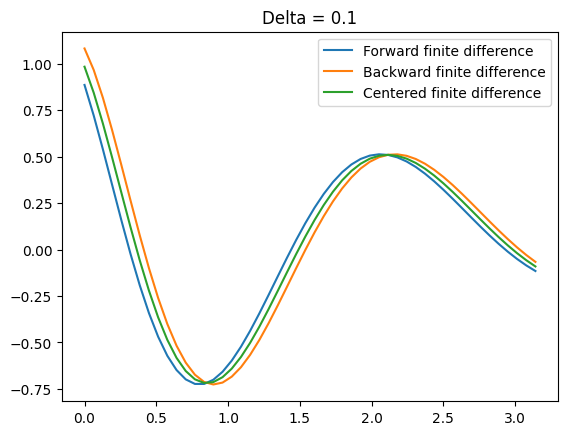

In [ ]:
X = np.linspace(0, np.pi)
delta = 0.1
derF = []
derB = []
derC = []

for x in X:

    f, b, c = Cal_Der(x, Func, delta) #calcula a derivada da função
    derF.append(f)
    derB.append(b)
    derC.append(c)

plt.plot(X, derF, label="Forward finite difference")
plt.plot(X, derB, label="Backward finite difference")
plt.plot(X, derC, label="Centered finite difference")
plt.legend()
plt.title("Delta = 0.1")
plt.show()

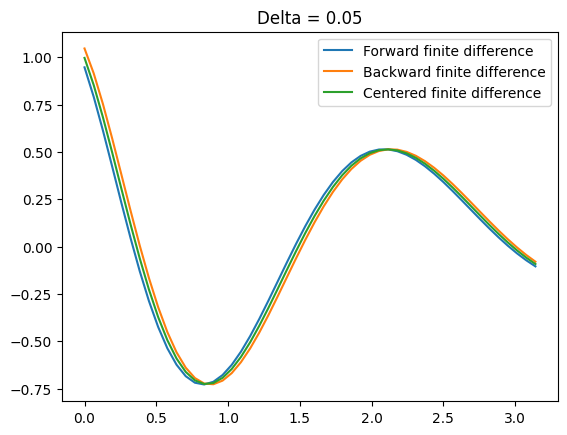

In [ ]:
X = np.linspace(0, np.pi)
delta = 0.05
derF = []
derB = []
derC = []

for x in X:

    f, b, c = Cal_Der(x, Func, delta)
    derF.append(f)
    derB.append(b)
    derC.append(c)

plt.plot(X, derF, label="Forward finite difference")
plt.plot(X, derB, label="Backward finite difference")
plt.plot(X, derC, label="Centered finite difference")
plt.legend()
plt.title("Delta = 0.05")
plt.show()

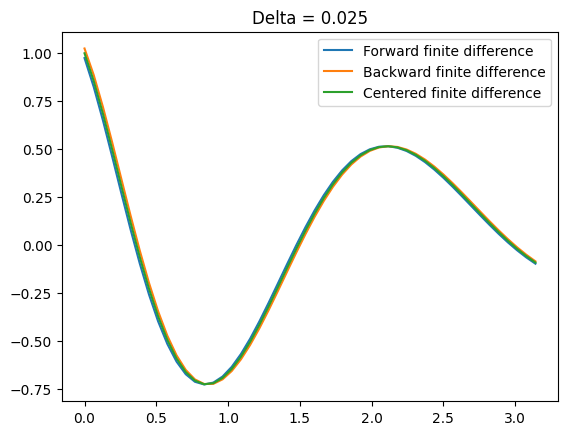

In [ ]:
X = np.linspace(0, np.pi)
delta = 0.025
derF = []
derB = []
derC = []

for x in X:

    f, b, c = Cal_Der(x, Func, delta)
    derF.append(f)
    derB.append(b)
    derC.append(c)

plt.plot(X, derF, label="Forward finite difference")
plt.plot(X, derB, label="Backward finite difference")
plt.plot(X, derC, label="Centered finite difference")
plt.legend()
plt.title("Delta = 0.025")
plt.show()

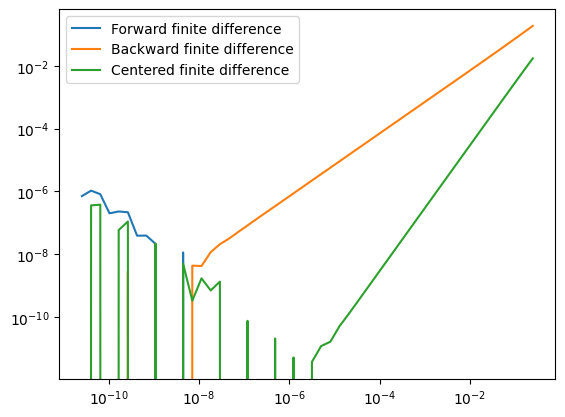

In [ ]:
x_ = np.pi / 2
K = np.linspace(0, 10)
deltas = []
erroF_ = []
erroB_ = []
erroC_ = []

for k in K:
    delta = (0.25) / (10**k)
    deltas.append(delta)
    rF, rB, rC = Cal_Der(x_, Func, delta)

    erroF_.append(Der(x_) - rF)
    erroB_.append(Der(x_) - rB)
    erroC_.append(Der(x_) - rC)

plt.loglog(deltas, erroF_, label="Forward finite difference")
plt.loglog(deltas, erroB_, label="Backward finite difference")
plt.loglog(deltas, erroC_, label="Centered finite difference")
plt.legend()
plt.show()

